## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
data=pd.read_csv('ecommerce_furniture_dataset_2024.csv')
data.shape

(2000, 5)

## Data Inspection

In [3]:
#Displaying the rows of dataframe for verification
data.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


## Data Preprocessing

In [28]:
# Finding Duplicates
data.duplicated().sum()

np.int64(0)

In [29]:
#Droping the duplicated values
data.drop_duplicates(inplace=True)

## Fill NaN values with 0

In [7]:
data.fillna(0)

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,0,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,0,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",0,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
...,...,...,...,...,...
1992,Oversized Outdoor Swivel Rocker Chairs Set wit...,0,$555.46,0,Free shipping
1993,6pcs Patio Furniture Set PE Rattan Wicker Sect...,0,$325.83,4,Free shipping
1994,Garden Furniture 4507 (Dark Grey) Steel Frame ...,0,$105.16,2,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,0,$228.18,0,Free shipping


In [8]:
#Describing the data for better understanding 
data.describe()

,sold
count,1906.000000
mean,24.449633
std,260.247848
min,0.000000
25%,1.000000
50%,3.000000
75%,9.750000
max,10000.000000


## Changing data types

In [9]:
# Remove '$' and ',' symbols, then convert to float
data['originalPrice'] = data['originalPrice'].astype(str).str.replace('[$,]', '', regex=True).replace('nan', None).astype(float)
data['price'] = data['price'].astype(str).str.replace('[$,]', '', regex=True).astype(float)

# Display the updated data types and first few rows
data.dtypes


productTitle      object
originalPrice    float64
price            float64
sold               int64
tagText           object
dtype: object

In [10]:
# Filling Original Price column by assuming 30% of Price column
data['originalPrice'] = data['originalPrice'].fillna(data['price'] * 1.3)
data.head(5)

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,60.827,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,220.636,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.400,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",145.587,111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,48.820,21.37,1,Free shipping


In [11]:
# Extract shipping cost  or set to 0 for "Free shipping"
data['shippingCost'] = data['tagText'].str.extract(r'(\d+\.\d+)')  # Extract numeric values
data['shippingCost'] = data['shippingCost'].fillna(0).astype(float)
data.drop# Convert to float, replace NaN with 0
# Display the updated DataFrame
data.head()


,productTitle,originalPrice,price,sold,tagText,shippingCost
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,60.827,46.79,600,Free shipping,0.0
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,220.636,169.72,0,Free shipping,0.0
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.400,39.46,7,Free shipping,0.0
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",145.587,111.99,0,Free shipping,0.0
4,Small Unit Simple Computer Desk Household Wood...,48.820,21.37,1,Free shipping,0.0


## Numerical Analysis

In [12]:
# Calculating total cost (price + shipping cost)
data['Total_Cost'] = data['price'] + data['shippingCost']
data.head()

,productTitle,originalPrice,price,sold,tagText,shippingCost,Total_Cost
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,60.827,46.79,600,Free shipping,0.0,46.79
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,220.636,169.72,0,Free shipping,0.0,169.72
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.400,39.46,7,Free shipping,0.0,39.46
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",145.587,111.99,0,Free shipping,0.0,111.99
4,Small Unit Simple Computer Desk Household Wood...,48.820,21.37,1,Free shipping,0.0,21.37


In [13]:
# Calculatibg total revenue (price * sold)
data['Total_Revenue'] = data['price'] * data['sold']
data.head()

,productTitle,originalPrice,price,sold,tagText,shippingCost,Total_Cost,Total_Revenue
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,60.827,46.79,600,Free shipping,0.0,46.79,28074.00
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,220.636,169.72,0,Free shipping,0.0,169.72,0.00
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.400,39.46,7,Free shipping,0.0,39.46,276.22
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",145.587,111.99,0,Free shipping,0.0,111.99,0.00
4,Small Unit Simple Computer Desk Household Wood...,48.820,21.37,1,Free shipping,0.0,21.37,21.37


In [14]:
#  Total sales for summing total revenue
total_sale=data['Total_Revenue'].sum()
print(f"Total Sales: ${total_sale:.2f}")

Total Sales: $2110806.88


## Exploratory Data Analysis (EDA)

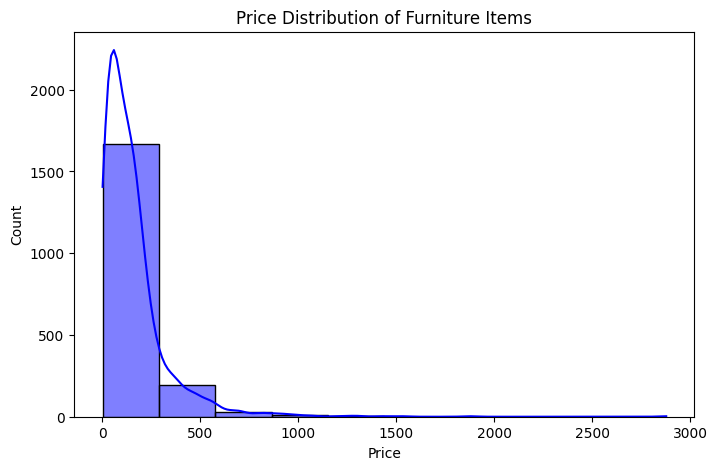

In [15]:
# Ploting the price distribution of furniture items
plt.figure(figsize=(8, 5))
sns.histplot(data["price"], bins=10, kde=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution of Furniture Items")
plt.show()

The graph shows the distribution of furniture item prices.The histogram is skewed to the right, indicating that most furniture items are priced lower, with a few items at higher price points.

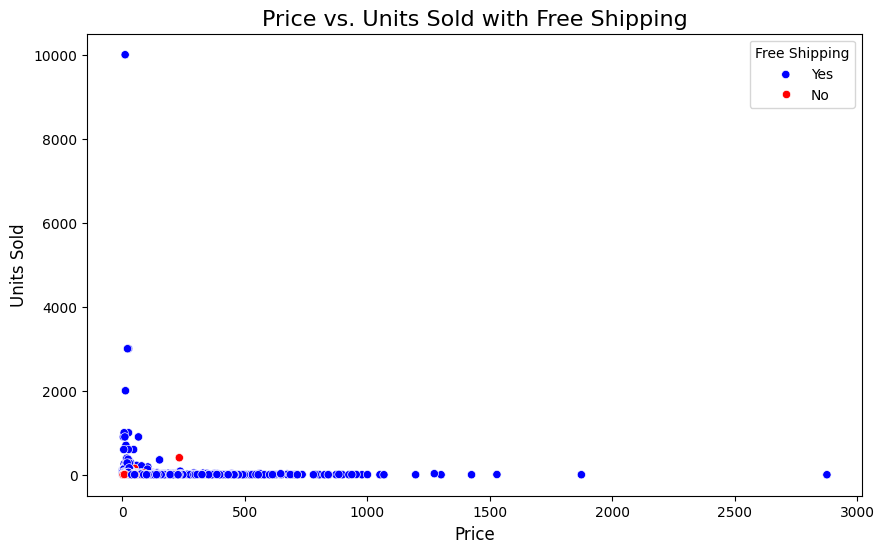

In [16]:
# Ploting the scatterplot for Price vs Unit sold with free Shipping
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='price', y='sold', hue=(data['tagText'] == 'Free shipping'), 
                palette={True: 'blue', False: 'red'})
plt.title('Price vs. Units Sold with Free Shipping', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(title="Free Shipping", labels=["Yes", "No"])
plt.show()

Offering that Free shipping can be a strong factor in increasing units sold, especially at lower price points. Products with free shipping tend to selling more units even at higher prices while without free shipping the number of units sold is likely to be significantly lower.

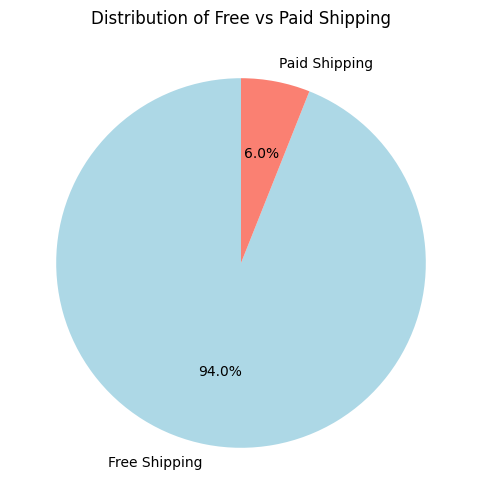

In [17]:
#Ploting pie chart for Distribution of Free vs Paid Shipping
shipping_counts = data['shippingCost'].apply(lambda x: 'Free Shipping' if x == 0 else 'Paid Shipping').value_counts()
plt.figure(figsize=(6, 6))
plt.pie(shipping_counts, labels=shipping_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90)
plt.title("Distribution of Free vs Paid Shipping")
plt.show()

This graph offering that the people are highly recommended free shipping even on high prices compare to paid shipping

C:\Users\Sankalp Pandey\AppData\Local\Temp\ipykernel_3560\246064275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sales['sold'], y=top_10_sales['productTitle'], palette='viridis')


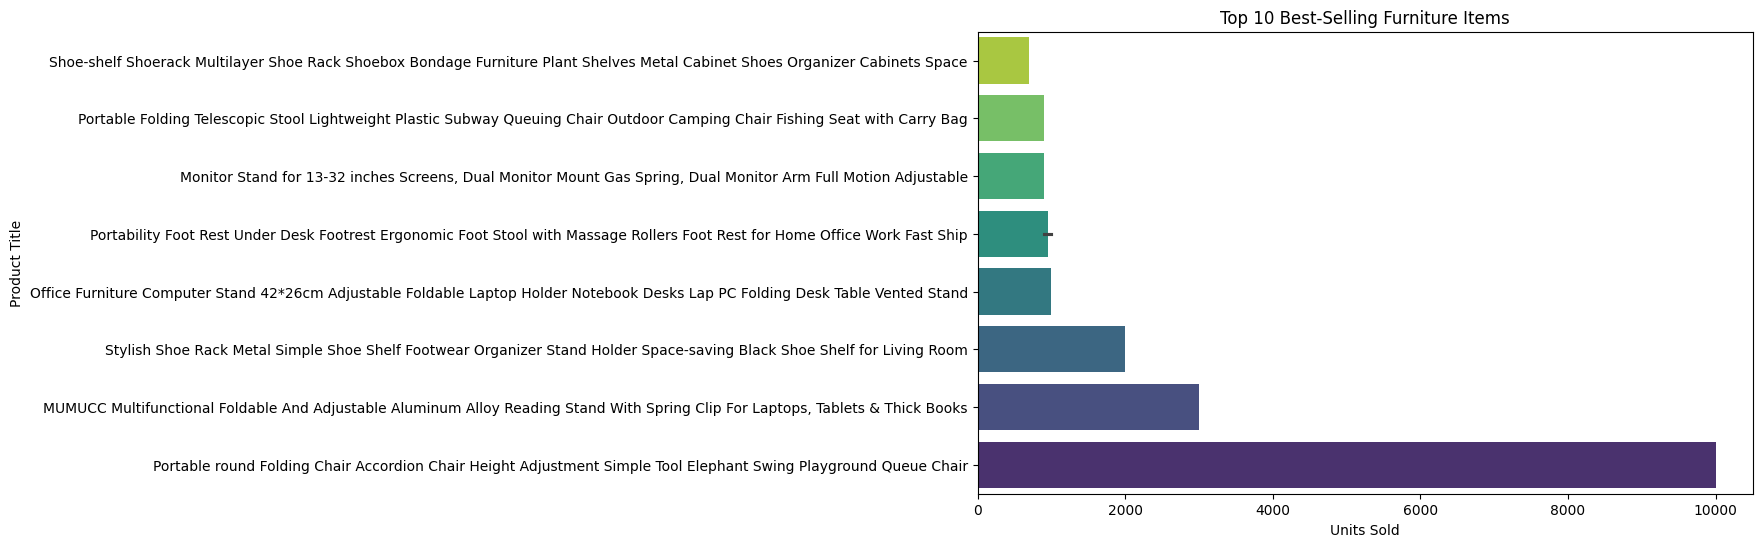

In [18]:
# Ploting the bar plot for top 10 Furniture item which sale
top_10_sales = data.nlargest(10, 'sold')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sales['sold'], y=top_10_sales['productTitle'], palette='viridis')
plt.xlabel("Units Sold")
plt.ylabel("Product Title")
plt.title("Top 10 Best-Selling Furniture Items")
plt.gca().invert_yaxis()  
plt.show()

## Feature Engineering

In [19]:
#Calculating discountAmount as originalPrice- price and calculating discount percentage as (discountAmount/OriginalPrice)*100
data['discountAmount']=data['originalPrice']-data['price']
data['discountPercent']=(data['discountAmount']/data['originalPrice'])*100
data.head(5)

,productTitle,originalPrice,price,sold,tagText,shippingCost,Total_Cost,Total_Revenue,discountAmount,discountPercent
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,60.827,46.79,600,Free shipping,0.0,46.79,28074.00,14.037,23.076923
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,220.636,169.72,0,Free shipping,0.0,169.72,0.00,50.916,23.076923
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.400,39.46,7,Free shipping,0.0,39.46,276.22,38.940,49.668367
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",145.587,111.99,0,Free shipping,0.0,111.99,0.00,33.597,23.076923
4,Small Unit Simple Computer Desk Household Wood...,48.820,21.37,1,Free shipping,0.0,21.37,21.37,27.450,56.226956


In [20]:
# Convert productTitle into a numeric feature using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = tfidf.fit_transform(data['productTitle'])

In [21]:
# Convert to DataFrame and concatenate to original df
productTitle_tfidf_df =pd.DataFrame(productTitle_tfidf.toarray(),
columns=tfidf.get_feature_names_out())
df = pd.concat([data, productTitle_tfidf_df], axis=1)

In [22]:
# Drop original productTitle as it's now encoded
df = df.drop('productTitle', axis=1)

In [23]:
df['tagText'] = df['tagText'].astype('category').cat.codes

## Model Selection & Training

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Split the dataset into features (X) and target (y)
X = data[['originalPrice', 'price', 'shippingCost']] 
y = data['sold']  
X = X.dropna()
y = y.loc[X.index]

In [26]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [27]:
# Predict with Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
# Print model evaluation results
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')
print(f'Random Forest MSE: {mse_rf}, R2: {r2_rf}')

Linear Regression MSE: 12842.67464534846, R2: 0.005601402889128804
Random Forest MSE: 11209.40128847979, R2: 0.13206452522299683
